In [ ]:
!nvidia-smi

Fri Aug  1 18:37:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/data.zip /content/

In [ ]:
!unzip -q data.zip -d /content/mask_images

replace /content/mask_images/classes.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
import shutil
import random


base_dir = 'mask_images'
images_dir = os.path.join(base_dir, 'images')
labels_dir = os.path.join(base_dir, 'labels')

output_dir = 'dataset'
train_ratio = 0.9  # 90% train, 10% val

image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

random.shuffle(image_files)

split_index = int(len(image_files) * train_ratio)
train_files = image_files[:split_index]
val_files = image_files[split_index:]

def copy_files(file_list, split):
    for filename in file_list:
        name, _ = os.path.splitext(filename)
        img_src = os.path.join(images_dir, filename)
        label_src = os.path.join(labels_dir, f"{name}.txt")

        img_dst = os.path.join(output_dir, split, 'images', filename)
        label_dst = os.path.join(output_dir, split, 'labels', f"{name}.txt")

        os.makedirs(os.path.dirname(img_dst), exist_ok=True)
        os.makedirs(os.path.dirname(label_dst), exist_ok=True)

        shutil.copy(img_src, img_dst)
        shutil.copy(label_src, label_dst)

copy_files(train_files, 'train')
copy_files(val_files, 'val')

In [ ]:
yaml_content = """
train: dataset/train/images
val: dataset/val/images

nc: 1
names: ['mask']
"""

with open("data.yaml", "w") as f:
    f.write(yaml_content.strip())

In [ ]:
!pip -q install ultralytics

In [ ]:
!yolo detect train data=data.yaml model=yolov8n.pt epochs=60 imgsz=640

Ultralytics 8.3.172 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fal

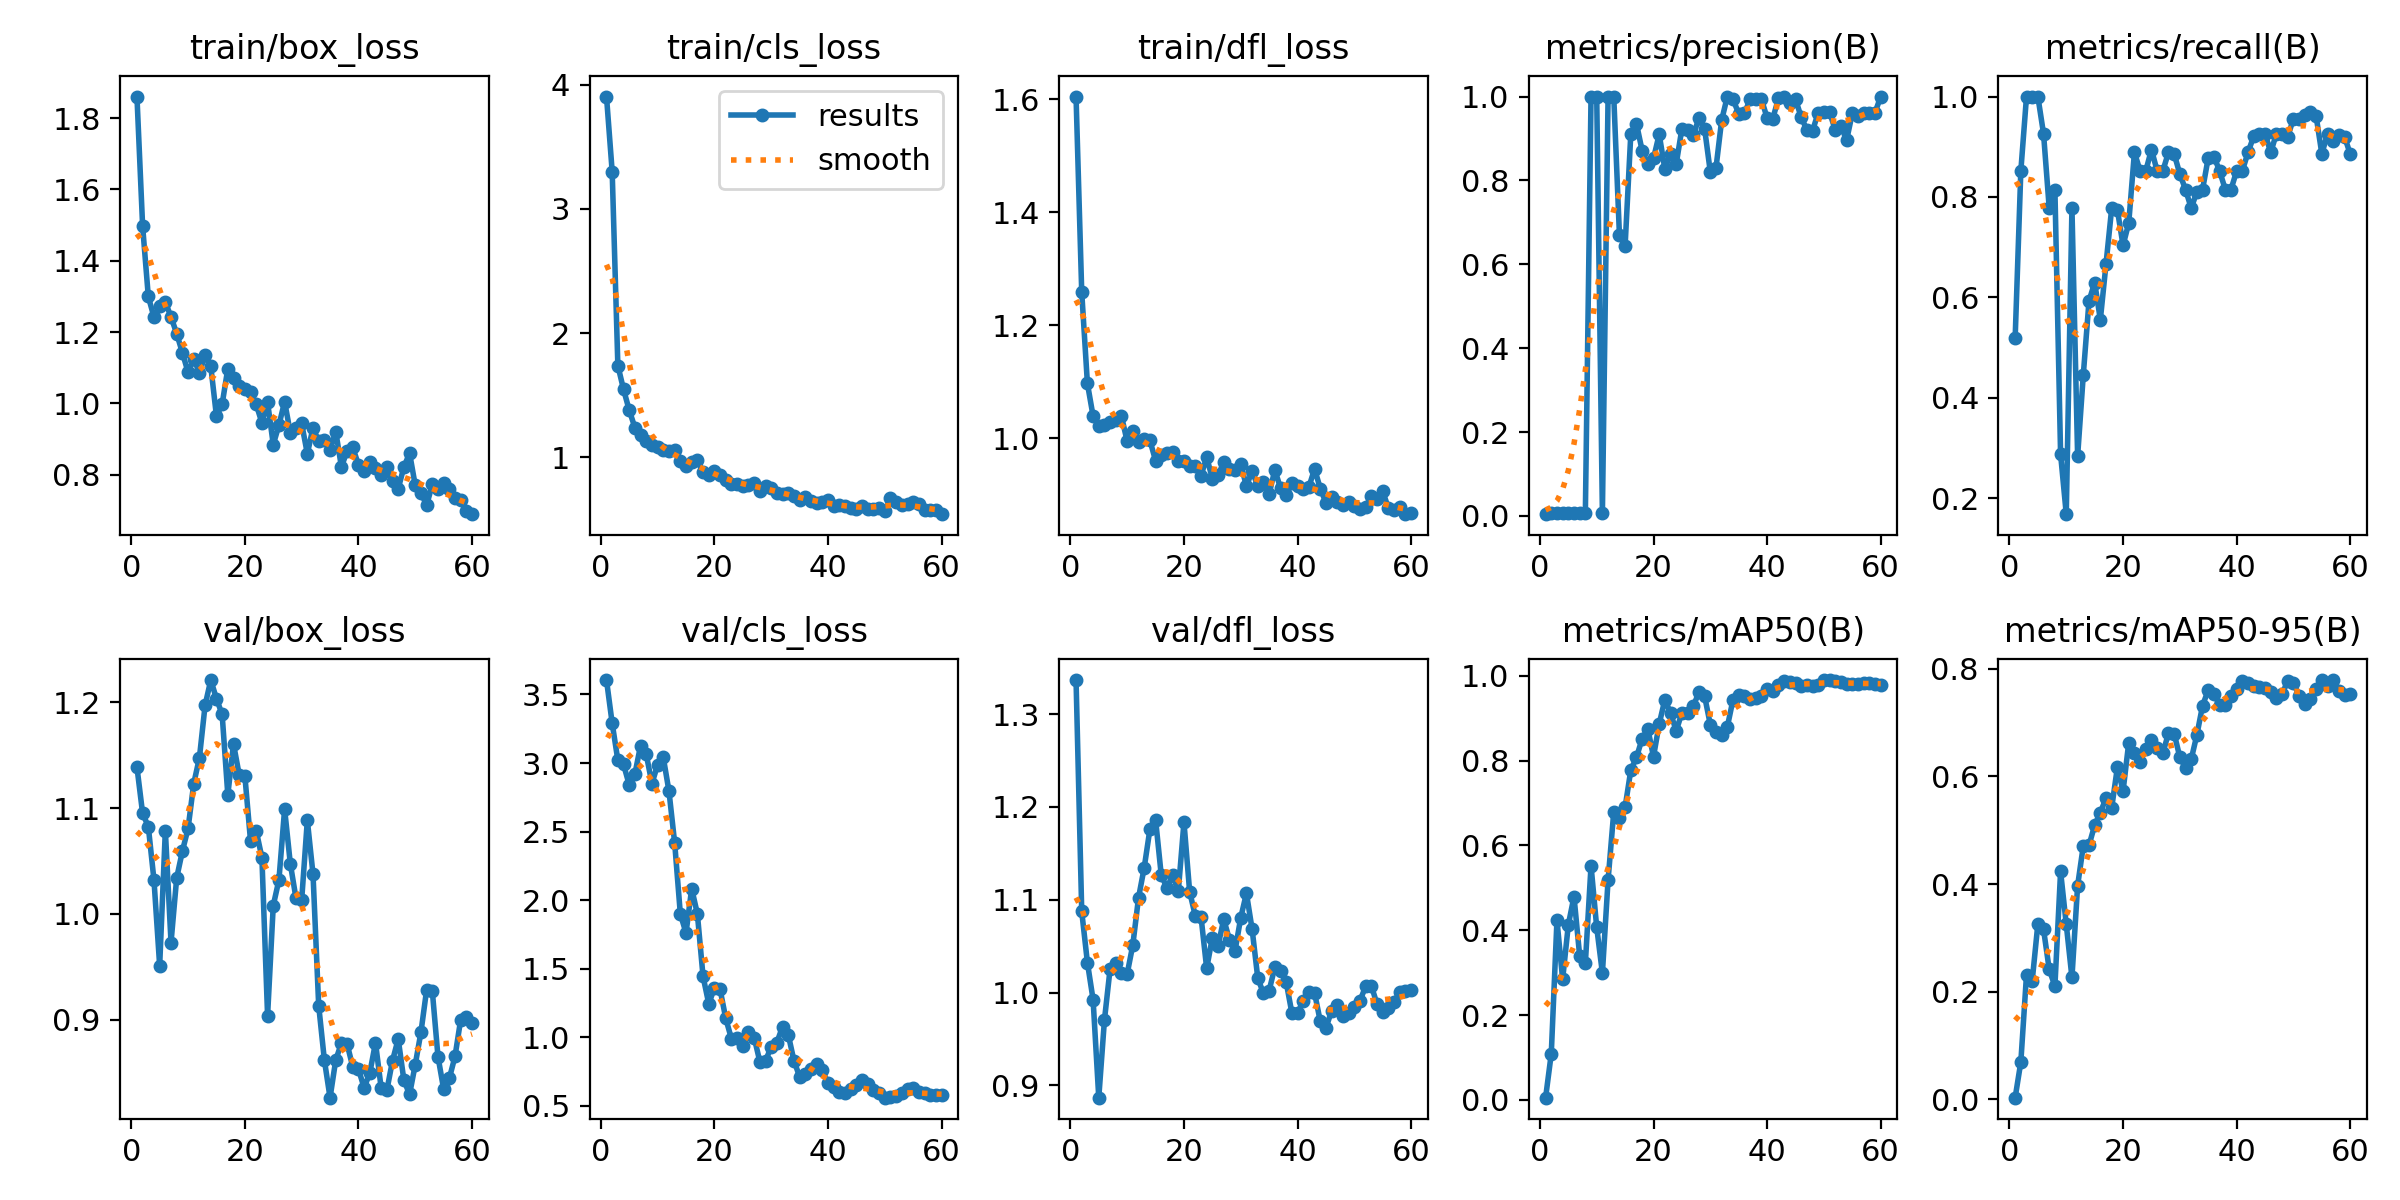

In [ ]:
from IPython.display import Image

Image(filename='runs/detect/train/results.png')

In [ ]:
!yolo detect val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics 8.3.172 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2333.9±1051.7 MB/s, size: 386.9 KB)
val: Scanning /content/dataset/val/labels.cache... 21 images, 2 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.02s/it]
                   all         21         54      0.981      0.956      0.992       0.83
Speed: 1.1ms preprocess, 26.1ms inference, 0.0ms loss, 32.1ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=dataset/val/images

Ultralytics 8.3.172 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/21 /content/dataset/val/images/19116fad-maksssksksss36.png: 384x640 7 masks, 37.7ms
image 2/21 /content/dataset/val/images/3154ff37-maksssksksss6.png: 448x640 1 mask, 36.0ms
image 3/21 /content/dataset/val/images/4253e4fa-maksssksksss23.png: 480x640 1 mask, 34.9ms
image 4/21 /content/dataset/val/images/4ab16cf7-maksssksksss72.png: 640x512 (no detections), 34.1ms
image 5/21 /content/dataset/val/images/5a551bf0-maksssksksss54.png: 448x640 3 masks, 6.6ms
image 6/21 /content/dataset/val/images/7076a90b-maksssksksss66.png: 640x608 1 mask, 33.3ms
image 7/21 /content/dataset/val/images/740721c4-maksssksksss51.png: 640x512 (no detections), 6.6ms
image 8/21 /content/dataset/val/images/76dfd215-maksssksksss79.png: 640x640 5 masks, 8.0ms
image 9/21 /content/dataset/val/images/79aa0f52-maksssksksss4.png: 640x512 1 mask, 6.7ms
im

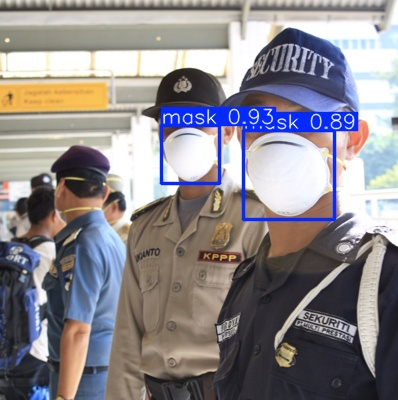

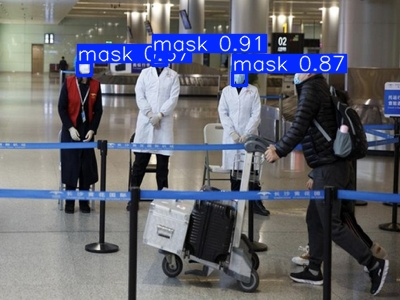

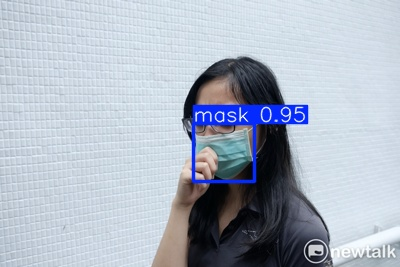

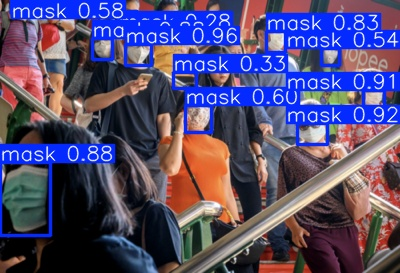

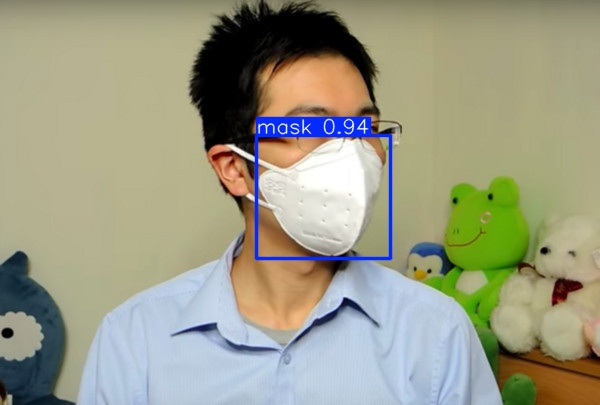

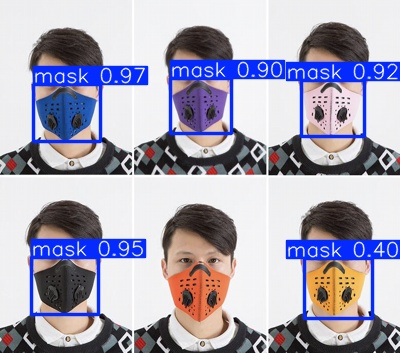

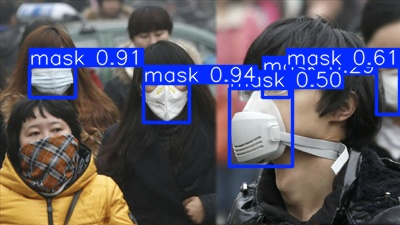

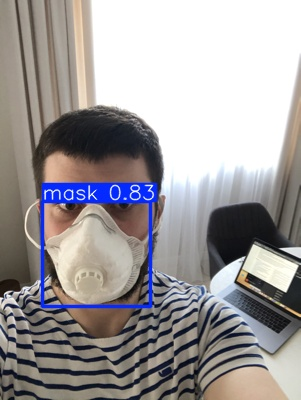

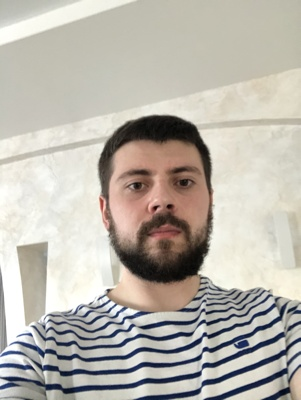

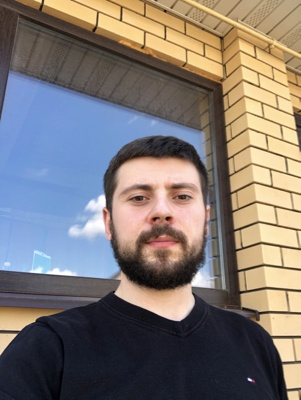

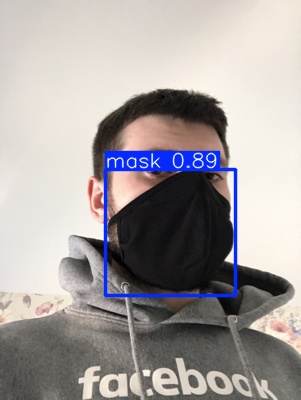

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg'):
    display(Image(filename=image_path))
    print("\n")